In [41]:
import numpy as np
import pandas as pd

In [42]:
# from pymongo import MongoClient

# db = MongoClient('mongodb://localhost/SmartHome', 27017).SmartHome

In [43]:
# table = db.video_hallway.find({})

In [44]:
PATH ='C:/Users/ralkh/Desktop/smarthome-master/'

df = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00003/video_hallway.csv')
df.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
0,69.586,218.509872,147.058044,213.0,235.0,198.0,120.0,638.984375,-295.500000,3114.343750,584.386719,-1268.009033,3144.343750,410.999023,0.000000,3084.343750
1,69.648,208.595795,149.571671,213.0,235.0,186.0,118.0,540.306641,-328.789062,3170.640625,594.849670,-1290.711792,3200.640625,286.342743,22.026339,3140.640625
2,69.680,207.772278,148.801605,213.0,235.0,184.0,116.0,530.976440,-320.122375,3169.603027,594.656860,-1290.293335,3199.603027,264.228943,44.038200,3139.603027
3,69.711,206.688248,147.198105,213.0,235.0,180.0,116.0,516.609985,-300.949646,3155.445557,592.025635,-1284.584106,3185.445557,219.197922,43.839619,3125.445557
4,69.742,205.202682,146.745483,213.0,235.0,172.0,116.0,495.499512,-293.176697,3125.967529,586.546997,-1272.696533,3155.967529,130.278397,43.426140,3095.967529


In [45]:
df.describe()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,369.325281,177.140718,154.507478,201.274559,216.496222,152.982368,111.511335,71.120243,-346.081543,3405.841754,330.447235,-1051.504779,3435.841754,-174.481579,109.325563,3375.841754
std,328.060528,43.499664,19.343482,45.016799,26.624247,43.697599,23.619578,413.832437,140.118320,1420.905398,368.138187,229.210960,1420.905398,436.820207,239.843214,1420.905398
min,69.586000,123.963730,121.945114,125.000000,163.000000,114.000000,90.000000,-518.731506,-929.333374,1750.000000,-383.582306,-1603.102173,1780.000000,-698.746033,-908.328369,1720.000000
25%,77.094000,142.928997,142.488739,161.000000,189.000000,126.000000,96.000000,-265.746895,-419.656990,2384.261780,15.370265,-1222.620789,2414.261780,-503.454071,26.227482,2354.261780
50%,85.008500,159.875664,147.737366,195.000000,235.000000,132.000000,104.000000,-1.030109,-339.827637,2955.414429,359.908813,-1111.171448,2985.414429,-317.091827,143.987160,2925.414429
75%,821.420000,205.193867,173.824028,215.000000,235.000000,172.000000,116.000000,367.178024,-267.512581,4293.001953,576.452240,-845.539413,4323.001953,86.435396,273.707382,4263.001953
max,828.678000,286.079956,222.992340,287.000000,235.000000,276.000000,222.000000,1011.122437,-34.187202,6467.008789,1060.654541,-544.251465,6497.008789,959.881042,435.113983,6437.008789


In [46]:
df.isnull().sum()

t              0
centre_2d_x    0
centre_2d_y    0
bb_2d_br_x     0
bb_2d_br_y     0
bb_2d_tl_x     0
bb_2d_tl_y     0
centre_3d_x    0
centre_3d_y    0
centre_3d_z    0
bb_3d_brb_x    0
bb_3d_brb_y    0
bb_3d_brb_z    0
bb_3d_flt_x    0
bb_3d_flt_y    0
bb_3d_flt_z    0
dtype: int64

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [48]:
%matplotlib inline
rcParams['figure.figsize'] = 30,5
sb.set_style('whitegrid')

In [49]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

In [50]:
centre_3d_x = df.centre_3d_x
centre_3d_y = df.centre_3d_y
centre_3d_z = df.centre_3d_z

bb_3d_brb_x  = df.bb_3d_brb_x
bb_3d_brb_y  = df.bb_3d_brb_y
bb_3d_brb_z  = df.bb_3d_brb_z

bb_3d_flt_x  = df.bb_3d_flt_x
bb_3d_flt_y  = df.bb_3d_flt_y
bb_3d_flt_z  = df.bb_3d_flt_z

In [51]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

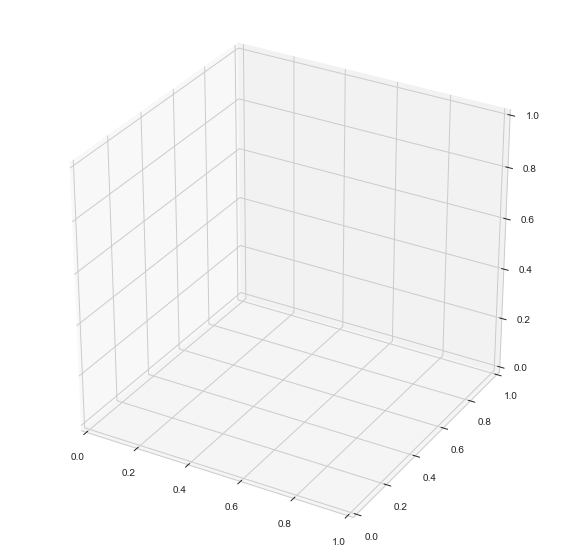

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from itertools import product, combinations

# Rectangle()
rcParams['figure.figsize'] = 10,10
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

In [53]:
def Moves(x):
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=centre_3d_x[x], ys=centre_3d_y[x], zs=centre_3d_z[x], c='r', marker='o')
    ax.scatter(xs=bb_3d_brb_x[x], ys=bb_3d_brb_y[x], zs=bb_3d_brb_z[x], c='b', marker='o')
    ax.scatter(xs=bb_3d_flt_x[x], ys=bb_3d_flt_y[x], zs=bb_3d_flt_z[x], c='b', marker='o')
   
    plt.show()

In [54]:
widgets.interact(Moves, x=widgets.IntSlider(min=1,max=centre_3d_y.count()-1,step=1,value=1));

In [55]:
from PIL import Image
import matplotlib.patches as patches
from matplotlib import animation, rc
from IPython.display import HTML

In [56]:
centre_2d_x = df.centre_2d_x
centre_2d_y = df.centre_2d_y

bb_2d_tl_x = df.bb_2d_tl_x
bb_2d_tl_y = df.bb_2d_tl_y
 
bb_2d_br_x = df.bb_2d_br_x 
bb_2d_br_y = df.bb_2d_br_x 

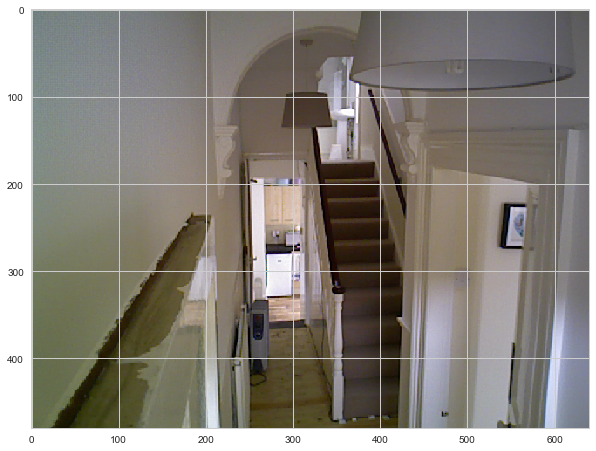

In [57]:
# First set up the figure, the axis, and the plot element we want to animate
im = np.array(Image.open('hallway.png'), dtype=np.uint8)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

patch = patches.Rectangle((0, 0), 0, 0, fc='y')

In [58]:
# # initialization function: plot the background of each frame

def init():
    ax.add_patch(patch)
    return patch,

In [59]:
def animate(i):
    height =  bb_2d_br_y[i] - bb_2d_tl_y[i]

    weidth =  bb_2d_br_x[i] - bb_2d_tl_x[i]

    patch.set_width(weidth)
    patch.set_height(height)
    
    patch.set_xy([centre_2d_x[i] , centre_2d_x[i]])
    
    return patch,

In [60]:
anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=500,
                               interval=50,
                               blit=True)
plt.show()
HTML(anim.to_html5_video())